# 필요한 패키지 임포트

In [1]:
import os
import cv2
import numpy as np
import random
from PIL import Image

from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [2]:
## 이미지 불러와서 이미지 크기를 임의의 크기 으로 이미지 리사이즈
all_folders = os.listdir("./TrafficLightImage/")
print(all_folders)

# positive, negative
for x in all_folders:
    path = 'TrafficLightImage/' + x + '/' 
    file_list = os.listdir(path) # 폴더 하나마다 들어있는 파일들 리스트 저장

    for A in file_list:
        if A == ".DS_Store":
            continue
        img = cv2.imread(path + A)
        res = cv2.resize(img, dsize = (45, 15), interpolation = cv2.INTER_CUBIC)
        cv2.imwrite(path + A, res)

['negative', 'positive']


In [3]:
c = os.listdir("TrafficLightImage")

print(c) # 0,1 지정할 때 순서 확인

['negative', 'positive']


In [4]:
class Data():
    def __init__(self):
        
        self.train_x = []
        self.train_y = []
        self.test_x = []
        self.test_y = []
        
        self.images()
        
    def images(self):
        data = []
        classes = os.listdir("TrafficLightImage")
        
        if ".DS_Store" in classes:
            classes.remove(".DS_Store")
            
        for i, light in enumerate(classes): # negative : 0, positive : 1
            print(i, light)
            PATH = os.listdir("TrafficLightImage/" + light)
            
            if ".DS_Store" in PATH:
                PATH.remove(".DS_Store")
                
            for x in PATH:
                img = Image.open("TrafficLightImage/"+ light + "/" + x)
                data.append((np.asarray(img),i))
                img.close()
                
        random.shuffle(data)
        
        # 데이터 분할
        for i in range(len(data)):
            if i < 0.7 * len(data):
                self.train_x.append(data[i][0])
                self.train_y.append(data[i][1])
            else:
                self.test_x.append(data[i][0])
                self.test_y.append(data[i][1])
                
        self.train_x = (np.asarray(self.train_x) - np.min(self.train_x, axis = 0)) / (np.max(self.train_x, axis = 0) - np.min(self.train_x, axis = 0))
        self.train_y = np.asarray(self.train_y)
        
        self.test_x = (np.asarray(self.test_x) - np.min(self.test_x, axis = 0)) / (np.max(self.test_x, axis = 0) - np.min(self.test_x, axis = 0))
        self.test_y = np.asarray(self.test_y)
        
        print("train x size : " + str(self.train_x.shape))
        print("train y size : " + str(self.train_y.shape))
        print("test x size : " + str(self.test_x.shape))
        print("test y size : " + str(self.test_y.shape))
        
    def draw_graph(history):
        train_history = history.history["loss"]
        validation_history = history.history["val_loss"]
        fig = plt.figure(figsize = (8, 8))
        plt.title("Loss History")
        plt.xlabel("EPOCH")
        plt.ylabel("LOSS Function")
        plt.plot(train_history, "red")
        plt.plot(validation_history, 'blue')
        # fig.savefig("train_history.png")

        train_history = history.history["accuracy"]
        validation_history = history.history["val_accuracy"]
        fig = plt.figure(figsize = (8, 8))
        plt.title("Accuracy History")
        plt.xlabel("EPOCH")
        plt.ylabel("Accuracy")
        plt.plot(train_history, "red")
        plt.plot(validation_history, 'blue')
        # fig.savefig("accuracy_history.png")
        

In [5]:
A = Data()

0 negative
1 positive
train x size : (9278, 15, 45, 3)
train y size : (9278,)
test x size : (3976, 15, 45, 3)
test y size : (3976,)


In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (5, 5), activation = "relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(2, activation = "softmax")
])

In [7]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"], 
              loss = "sparse_categorical_crossentropy")

In [8]:
Epochs = 20

In [9]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [10]:
history = model.fit(A.train_x, A.train_y, 
                    epochs = Epochs,
                    batch_size = 64,
                    validation_data = (A.test_x, A.test_y),
                    callbacks = [early_stop]
                    )

Epoch 1/20
145/145 [==============================] - 2s 13ms/step - loss: 0.4716 - accuracy: 0.7698 - val_loss: 0.1138 - val_accuracy: 0.9668
Epoch 2/20
145/145 [==============================] - 2s 12ms/step - loss: 0.1441 - accuracy: 0.9525 - val_loss: 0.0595 - val_accuracy: 0.9816
Epoch 3/20
145/145 [==============================] - 2s 12ms/step - loss: 0.0917 - accuracy: 0.9715 - val_loss: 0.0457 - val_accuracy: 0.9849
Epoch 4/20
145/145 [==============================] - 2s 12ms/step - loss: 0.0818 - accuracy: 0.9742 - val_loss: 0.0426 - val_accuracy: 0.9847
Epoch 5/20
145/145 [==============================] - 2s 12ms/step - loss: 0.0786 - accuracy: 0.9728 - val_loss: 0.0404 - val_accuracy: 0.9869
Epoch 6/20
145/145 [==============================] - 2s 12ms/step - loss: 0.0670 - accuracy: 0.9779 - val_loss: 0.0329 - val_accuracy: 0.9904
Epoch 7/20
145/145 [==============================] - 2s 12ms/step - loss: 0.0634 - accuracy: 0.9791 - val_loss: 0.0303 - val_accuracy: 0.9912

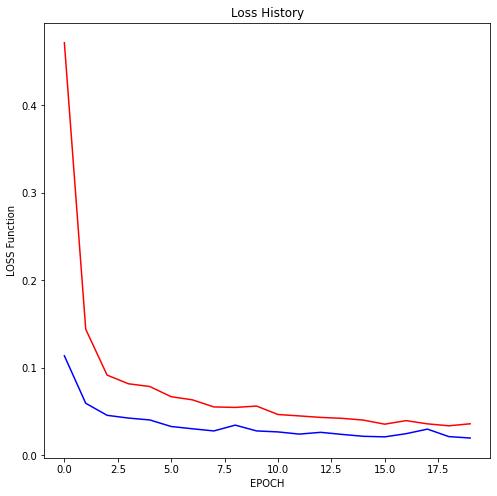

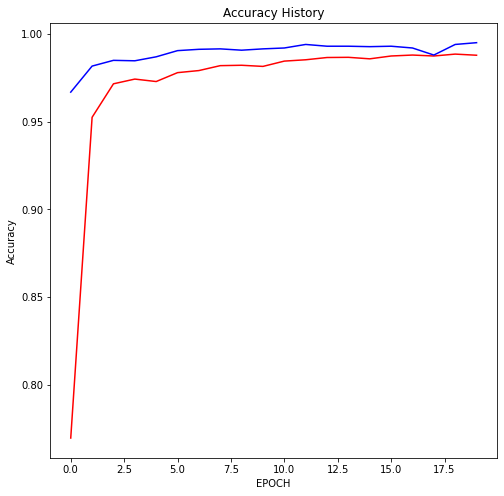

In [11]:
Data.draw_graph(history)

In [16]:
# 모델 저장
model.save("traffic_light_detection_v7.h5")   

In [17]:
# 모델 불러오기

In [18]:
model = tf.keras.models.load_model('traffic_light_detection_v7.h5')

# traffic_light_detection_v4 괜찮음

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 41, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 20, 32)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 20, 32)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 18, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 1, 9, 64)          0

In [20]:
Path2 = 'data_2/all/'
file_list = os.listdir(Path2)

if ".DS_Store" in file_list:
    file_list.remove(".DS_Store")

data2 = []

for A in file_list:
    if A == ".DS_Store":
        continue
        
    img2 = cv2.imread(Path2 + A)
    res2 = cv2.resize(img2, dsize = (45, 15), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(Path2 + A, res2)
    
for A in file_list:
    if A == ".DS_Store":
        continue
        
    img3 = Image.open(Path2 + A)
    data2.append(np.array(img3))
    img3.close()

In [21]:
data2 = np.asarray(data2) / 255.0

In [22]:
prediction = model.predict(data2)

In [23]:
light_order = {0 : "negative", 1 : "positive"}

for i,x in enumerate(prediction):
    count = 0
    for y in x:
        if y > 0.90:
            count += 1
    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])

0번째 신호등: 13649663_1.jpg : positive
1번째 신호등: 13668147_134.jpg : negative
3번째 신호등: 13668147_151.jpg : negative
4번째 신호등: 13681518_172.jpg : negative
5번째 신호등: 15430669_2.jpg : positive
6번째 신호등: 15436551_1.jpg : positive
7번째 신호등: 227331.jpg : positive
8번째 신호등: 227332.jpg : negative
9번째 신호등: 227333.jpg : negative
10번째 신호등: 227334.jpg : negative
11번째 신호등: 227335.jpg : negative
12번째 신호등: 227336.jpg : negative
13번째 신호등: 227337.jpg : negative
14번째 신호등: 227338.jpg : negative
15번째 신호등: 227339.jpg : negative
16번째 신호등: 227340.jpg : negative
17번째 신호등: 2348.jpg : positive
18번째 신호등: 2349.jpg : positive
19번째 신호등: 24349.jpg : positive
20번째 신호등: 24350.jpg : negative
21번째 신호등: 24351.jpg : negative
22번째 신호등: 24352.jpg : negative
23번째 신호등: 24353.jpg : negative
24번째 신호등: 24354.jpg : negative
25번째 신호등: 24355.jpg : negative
26번째 신호등: 24356.jpg : negative
27번째 신호등: 24357.jpg : negative
28번째 신호등: 24358.jpg : negative
29번째 신호등: 24359.jpg : negative
30번째 신호등: 79464.jpg : negative
31번째 신호등: 79465.jpg : positive
32번째

# 이미지랑 같이 출력

0.0036740727
0.9963259
0번째 신호등: 13649663_1.jpg : positive


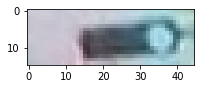

0.9998294
0.00017053698
1번째 신호등: 13668147_134.jpg : negative


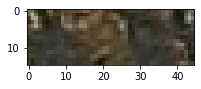

0.37310022
0.6268997
Unknown


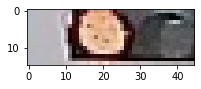

0.99923396
0.000766076
3번째 신호등: 13668147_151.jpg : negative


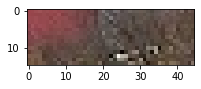

0.9999949
5.14023e-06
4번째 신호등: 13681518_172.jpg : negative


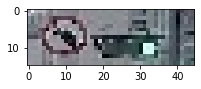

4.821843e-07
0.9999995
5번째 신호등: 15430669_2.jpg : positive


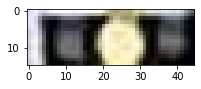

0.0003182398
0.99968183
6번째 신호등: 15436551_1.jpg : positive


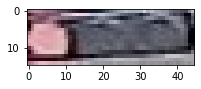

0.009822424
0.9901776
7번째 신호등: 227331.jpg : positive


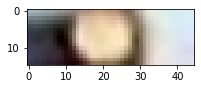

0.99941754
0.0005824941
8번째 신호등: 227332.jpg : negative


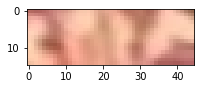

0.99999726
2.6871612e-06
9번째 신호등: 227333.jpg : negative


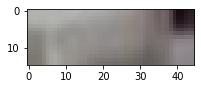

0.9997191
0.0002809134
10번째 신호등: 227334.jpg : negative


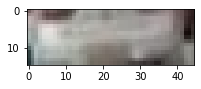

0.9999523
4.765792e-05
11번째 신호등: 227335.jpg : negative


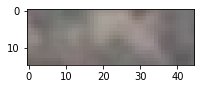

0.99998236
1.7627353e-05
12번째 신호등: 227336.jpg : negative


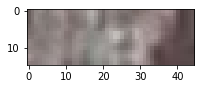

0.9999391
6.0969483e-05
13번째 신호등: 227337.jpg : negative


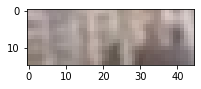

0.9990127
0.0009873271
14번째 신호등: 227338.jpg : negative


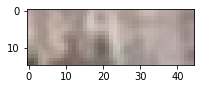

0.99993837
6.1674364e-05
15번째 신호등: 227339.jpg : negative


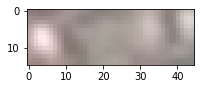

0.99992955
7.046153e-05
16번째 신호등: 227340.jpg : negative


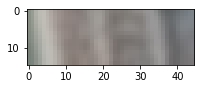

0.0068201683
0.9931798
17번째 신호등: 2348.jpg : positive


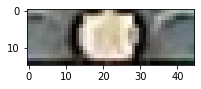

0.0005558009
0.9994442
18번째 신호등: 2349.jpg : positive


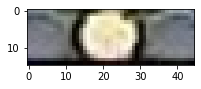

0.0051693297
0.99483067
19번째 신호등: 24349.jpg : positive


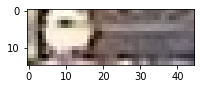

0.9999995
4.9790435e-07
20번째 신호등: 24350.jpg : negative


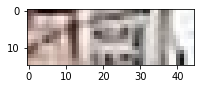

0.9999938
6.2031563e-06
21번째 신호등: 24351.jpg : negative


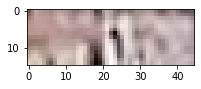

0.9999528
4.7256228e-05
22번째 신호등: 24352.jpg : negative


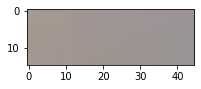

0.99993396
6.6063236e-05
23번째 신호등: 24353.jpg : negative


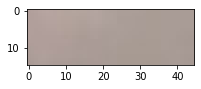

0.9991043
0.00089570275
24번째 신호등: 24354.jpg : negative


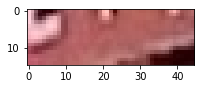

0.999658
0.00034203933
25번째 신호등: 24355.jpg : negative


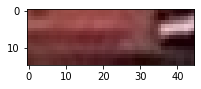

0.9990163
0.0009836855
26번째 신호등: 24356.jpg : negative


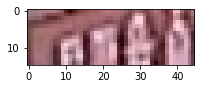

0.99998724
1.2706816e-05
27번째 신호등: 24357.jpg : negative


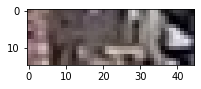

0.9999747
2.5275604e-05
28번째 신호등: 24358.jpg : negative


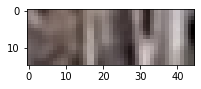

0.9700946
0.029905347
29번째 신호등: 24359.jpg : negative


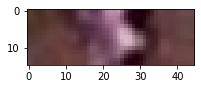

0.99956554
0.0004344702
30번째 신호등: 79464.jpg : negative


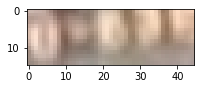

1.9529445e-07
0.99999976
31번째 신호등: 79465.jpg : positive


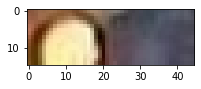

0.9999373
6.264481e-05
32번째 신호등: 81324.jpg : negative


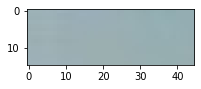

0.99989736
0.0001026679
33번째 신호등: 81325.jpg : negative


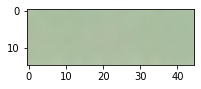

0.9960323
0.003967739
34번째 신호등: 81326.jpg : negative


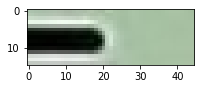

0.99996626
3.376642e-05
35번째 신호등: 81327.jpg : negative


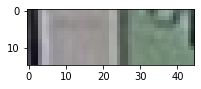

0.99994695
5.3046184e-05
36번째 신호등: 81328.jpg : negative


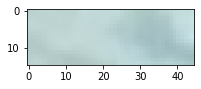

0.9998802
0.00011984083
37번째 신호등: 81329.jpg : negative


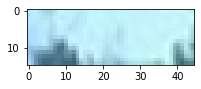

0.9997193
0.00028068532
38번째 신호등: 81330.jpg : negative


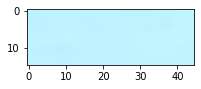

0.99966466
0.00033531687
39번째 신호등: 81331.jpg : negative


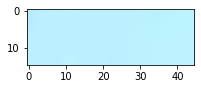

0.9996692
0.00033081314
40번째 신호등: 81332.jpg : negative


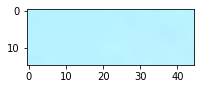

0.9996954
0.0003046543
41번째 신호등: 81333.jpg : negative


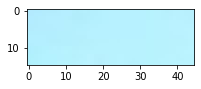

0.9996915
0.00030848273
42번째 신호등: 81334.jpg : negative


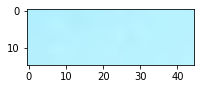

0.9999527
4.734757e-05
43번째 신호등: 81335.jpg : negative


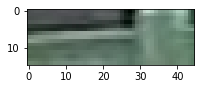

0.99724895
0.0027510014
44번째 신호등: 81336.jpg : negative


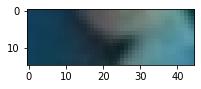

0.9996929
0.00030708424
45번째 신호등: 81337.jpg : negative


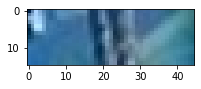

4.4409967e-07
0.9999995
46번째 신호등: 81338.jpg : positive


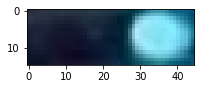

0.9998574
0.00014260635
47번째 신호등: 81339.jpg : negative


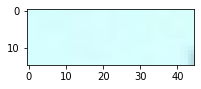

3.1681147e-06
0.9999968
48번째 신호등: 81340.jpg : positive


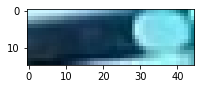

3.4090112e-07
0.99999964
49번째 신호등: 81341.jpg : positive


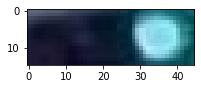

0.9970701
0.0029299357
50번째 신호등: frame0_19.jpg : negative


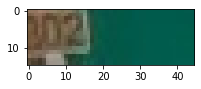

1.2822582e-05
0.9999871
51번째 신호등: frame14_24.jpg : positive


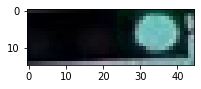

0.99908936
0.0009106398
52번째 신호등: frame17_32.jpg : negative


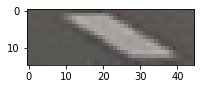

0.9999176
8.240635e-05
53번째 신호등: frame18_36.jpg : negative


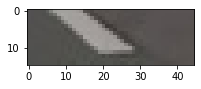

0.9999819
1.8090132e-05
54번째 신호등: frame1_6.jpg : negative


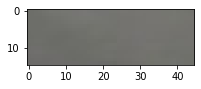

0.9999994
6.2898454e-07
55번째 신호등: frame1_7.jpg : negative


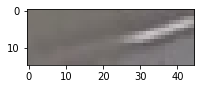

0.99999523
4.726046e-06
56번째 신호등: frame1_8.jpg : negative


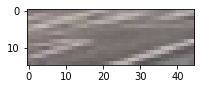

0.9999647
3.5337376e-05
57번째 신호등: frame1_9.jpg : negative


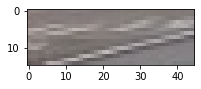

0.9946538
0.0053462223
58번째 신호등: frame29_719.jpg : negative


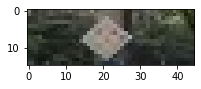

1.0235481e-06
0.9999989
59번째 신호등: frame34_215.jpg : positive


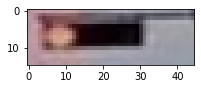

0.00024351943
0.9997565
60번째 신호등: frame34_216.jpg : positive


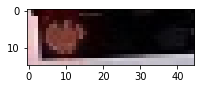

0.9999844
1.5604019e-05
61번째 신호등: frame35_223.jpg : negative


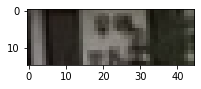

0.9999844
1.5656027e-05
62번째 신호등: frame35_948.jpg : negative


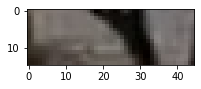

0.9995702
0.0004297845
63번째 신호등: frame35_953.jpg : negative


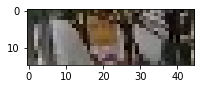

0.9986456
0.0013543622
64번째 신호등: frame3_149.jpg : negative


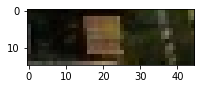

0.99987555
0.000124404
65번째 신호등: frame3_150.jpg : negative


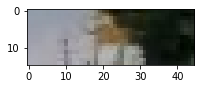

0.99999404
5.931351e-06
66번째 신호등: frame52_441.jpg : negative


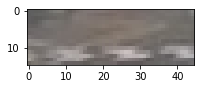

0.9999523
4.7632475e-05
67번째 신호등: frame52_442.jpg : negative


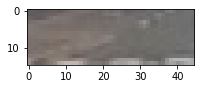

0.9999871
1.29038035e-05
68번째 신호등: frame54_477.jpg : negative


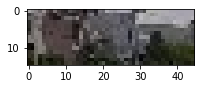

0.010848685
0.98915136
69번째 신호등: frame54_478.jpg : positive


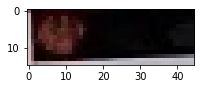

0.9999931
6.8676654e-06
70번째 신호등: frame56_495.jpg : negative


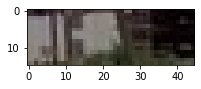

0.99999774
2.2326449e-06
71번째 신호등: frame57_510.jpg : negative


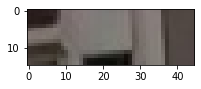

0.9999833
1.665852e-05
72번째 신호등: frame66_1982.jpg : negative


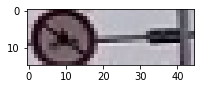

0.99909735
0.00090267847
73번째 신호등: frame67_1989.jpg : negative


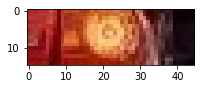

0.9999763
2.3720686e-05
74번째 신호등: frame6_526.jpg : negative


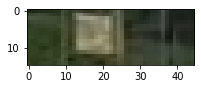

0.99773526
0.0022646647
75번째 신호등: frame9_670.jpg : negative


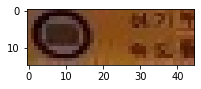

In [24]:
light_order = {0 : "negative", 1 : "positive"}

for i, x in enumerate(prediction):
    count = 0
    
    for y in x:
        print(y)
        if y > 0.90:
            count += 1
        
    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])
    else:
        print("Unknown")
      
    tstImg = cv2.imread(Path2 + file_list[i])
    tstImg = cv2.cvtColor(tstImg, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (3, 2))
    plt.imshow(tstImg)
    plt.show()
    print("=================================================")